# Titanic

In this notebook, I provide my own statistical analysis of the Titanic dataset.

## Data preparation

### Import data

The dataset includes train.csv and test.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### preprocessing

**Categorical variables**:

In [3]:
pclass_dummies_train=pd.get_dummies(train_df['Pclass'])
pclass_dummies_test=pd.get_dummies(test_df['Pclass'])
pclass_dummies_train.columns=['Pclass_1','Pclass_2','Pclass_3']
pclass_dummies_test.columns=['Pclass_1','Pclass_2','Pclass_3']

train_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

train_df=train_df.join(pclass_dummies_train)
test_df=test_df.join(pclass_dummies_test)

In [4]:
train_df=train_df.drop(['PassengerId','Name','Ticket','Cabin'],1)
train_df=pd.get_dummies(train_df)
train_df.dropna(inplace=True)
test_df=test_df.drop(['PassengerId','Name','Ticket','Cabin'],1)
test_df=pd.get_dummies(test_df)
test_df.dropna(inplace=True)

In [5]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [6]:
test_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### preparing training and validation data

The training data is splitted into train and validation sets.

In [7]:
from sklearn.cross_validation import train_test_split
X_train=train_df.drop(['Embarked_S','Sex_male','Pclass_3','Survived'],axis=1)
y_train=train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.8)

In [8]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
789,46.0,0,0,79.2000,1.0,0.0,0.0,1.0,0.0
234,24.0,0,0,10.5000,0.0,1.0,0.0,0.0,0.0
289,22.0,0,0,7.7500,0.0,0.0,1.0,0.0,1.0
209,40.0,0,0,31.0000,1.0,0.0,0.0,1.0,0.0
22,15.0,0,0,8.0292,0.0,0.0,1.0,0.0,1.0


###  prepare test data

In [9]:
X_test=test_df.drop(['Embarked_S','Sex_male','Pclass_3'],axis=1)

In [10]:
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,34.5,0,0,7.8292,0.0,0.0,0.0,0.0,1.0
1,47.0,1,0,7.0000,0.0,0.0,1.0,0.0,0.0
2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,27.0,0,0,8.6625,0.0,0.0,0.0,0.0,0.0
4,22.0,1,1,12.2875,0.0,0.0,1.0,0.0,0.0


## Data Analysis

First we use Logistic regression to select features.

### Logistic Regression

In [11]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

X_train=sm.add_constant(X_train)
X_val=sm.add_constant(X_val)
X_test=sm.add_constant(X_test)

logit = Logit(y_train,X_train)
result=logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.452154
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  142
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            9
Date:                Mon, 17 Apr 2017   Pseudo R-squ.:                  0.3287
Time:                        15:21:14   Log-Likelihood:                -64.206
converged:                       True   LL-Null:                       -95.648
                                        LLR p-value:                 3.714e-10
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1523      0.655      0.232      0.816        -1.132     1.437
Age           -0.0803      0.

In [12]:
from sklearn import metrics, cross_validation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

def ROCplot2(y_train, y_train_prob, y_val,y_val_prob, title):
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_train_prob)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    
    fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_val_prob)
    roc_auc_val = metrics.auc(fpr_val, tpr_val)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, blue_line],loc="lower right")

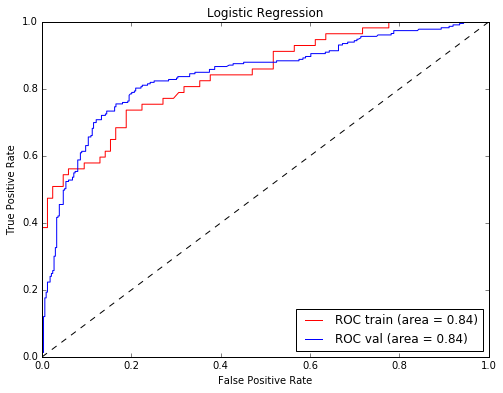

In [13]:
y_train_prob = result.predict(X_train)
y_val_prob = result.predict(X_val)
ROCplot2(y_train, y_train_prob, y_val,y_val_prob, 'Logistic Regression')

### sklearn logistic regression

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty='l1', C=1e5)
X_train.drop(['const'],axis=1,inplace=True)
X_val.drop(['const'],axis=1,inplace=True)
X_test.drop(['const'],axis=1,inplace=True)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
print ('Accuracy:', logreg.score(X_train, y_train), logreg.score(X_val, y_val))

('Accuracy:', 0.76056338028169013, 0.79545454545454541)


In [16]:
logreg.coef_

array([[-0.08024258, -0.71233037,  0.19809438, -0.00600489,  2.77451499,
         1.09857027,  2.97278263,  0.60578492,  0.24573464]])

In [17]:
def ROCplot(y_train, y_train_prob, y_val,y_val_prob, title):
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,y_train_prob[:,1])
    roc_auc_train = metrics.auc(fpr_train, tpr_train)

    fpr_val, tpr_val, _ = metrics.roc_curve(y_val,y_val_prob[:,1])
    roc_auc_val = metrics.auc(fpr_val, tpr_val)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_train, tpr_train, color = 'r')
    plt.plot(fpr_val, tpr_val, color = 'b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    red_line = mlines.Line2D([], [], color='red', label='ROC train (area = %0.2f)' % roc_auc_train)
    blue_line = mlines.Line2D([], [], color='blue', label='ROC val (area = %0.2f)' % roc_auc_val)
    plt.legend(handles=[red_line, blue_line],loc="lower right")

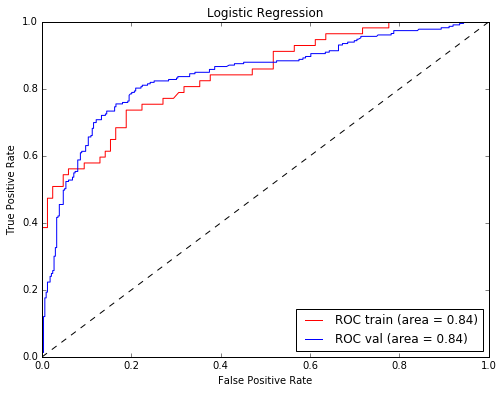

In [18]:
y_train_prob = logreg.predict_proba(X_train)
y_val_prob = logreg.predict_proba(X_val)
ROCplot(y_train, y_train_prob, y_val,y_val_prob, 'Logistic Regression')

## self-coded Bayes classifier

Given labeled data $(x_1,y_1),…,(x_N,y_N)$, where $x∈R^d$ and $y∈\{1,…,K\}$. 

$$
y_i \stackrel{iid}{\sim} Discrete(\pi),\quad x_i|y_i \sim Normal(\mu_{y_i},\Sigma_{y_i}),\quad i = 1,\dots, N.
$$

* **class prior**:
$$
P(Y=y)=\pi _y,y\in \{1,\ldots ,K\}
$$

* **class conditional density**:
$$
p(x|Y=y)=N\left(x\left|\mu _y\right.,\Sigma _y\right)
$$

* **MLE** of model parameters:
$$
\hat{\pi }_y=\frac{n_y}{n}=\frac{1}{n}\overset{n}{\sum _{i=1} }\mathbf{1}\left(y_i=y\right)
$$
$$
\hat{\mu }_y=\frac{1}{n_y}\overset{n}{\sum _{i=1} }\mathbf{1}\left(y_i=y\right)x_i
$$
$$
\hat{\Sigma }_y=\frac{1}{n_y}\overset{n}{\sum _{i=1} }\mathbf{1}\left(y_i=y\right)\left(x_i-\mu _y\right)\left(x_i-\mu _y\right)^T
$$

* **classifier**:
$$
f^{*}(X)=\underset{y\in \{1,\ldots ,K\}}{\text{argmax}}P(Y=y)p(x|Y=y)
$$
$$
f^{*}(X)=\underset{y\in \{1,\ldots ,K\}}{\text{argmax}}\hat{\pi }_y \left| \hat{\Sigma }_y \right|^{-\frac{1}{2}}\exp \left[-\frac{1}{2}\left(x-\hat{\mu}_y\right)^T\hat{\Sigma }_y^{-1}\left(x-\hat{\mu}_y\right)\right]
$$

In [19]:
def Bayes_classifier_train(k,X_train,y_train):
    """
    :type X_train: n*d numpy array
    :type y_train: n*1 numpy array
    :return value: (priors,[mu_i for i in xrange(1,K+1)],[Sigma_i for i in xrange(1,K+1)])
    :rtype priors: k*1 array
    :rtype mu_i: 1*d numpy array
    :rtype Sigma_i: d*d numpy array
    """
    # number of training data
    n=X_train.shape[0]
    # discrete prior
    priors=np.array([np.sum(y_train==y)/float(n) for y in xrange(k)])
    # mu_y
    mu_y=np.array([np.sum(np.array([X_train[i] for i in xrange(n) if y_train[i]==y]),axis=0)\
                   /float(np.sum(y_train==y)) for y in xrange(k)])
    # Sigma_y
    Sigma_y=np.array([np.sum(np.array([np.outer(X_train[i]-mu_y[y],X_train[i]-mu_y[y]) \
                                       for i in xrange(n) if y_train[i]==y]),axis=0)\
                      /float(np.sum(y_train==y)) for y in xrange(k)])
    return (priors,mu_y,Sigma_y)

In [20]:
def Bayes_classifier_predict(k,X_test, model_params):
    """
    :type k: int
    :type X_test: 1*d numpy array
    :type model_params: (priors,[mu_i for i in xrange(1,K+1)],[Sigma_i for i in xrange(1,K+1)])
    """
    n=X_test.shape[0]
    priors,mu_y,Sigma_y=model_params
    posteriors=np.array([[0. for y in xrange(k)] for i in xrange(n)])
    for j in xrange(n):
        for i in xrange(k):
            posteriors[j][i]=priors[i]*(2*np.pi*np.linalg.det(Sigma_y[i]))**(-0.5)\
            *np.exp(-0.5*np.dot(X_test[j]-mu_y[i],np.dot(np.linalg.inv(Sigma_y[i]),X_test[j]-mu_y[i])))
        posteriors[j]/=sum(posteriors[j])
    return posteriors

In [21]:
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)
X_train=X_train.as_matrix()
X_val=X_val.as_matrix()

In [22]:
model_params=Bayes_classifier_train(2,X_train,y_train)
y_train_prob=Bayes_classifier_predict(2,X_train, model_params)
y_val_prob=Bayes_classifier_predict(2,X_val, model_params)

In [23]:
y_train_pred=[np.argmax(e) for e in y_train_prob]
y_val_pred=[np.argmax(e) for e in y_val_prob]

In [24]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_train, y_train_pred),accuracy_score(y_val, y_val_pred)

0.816901408451 0.809440559441


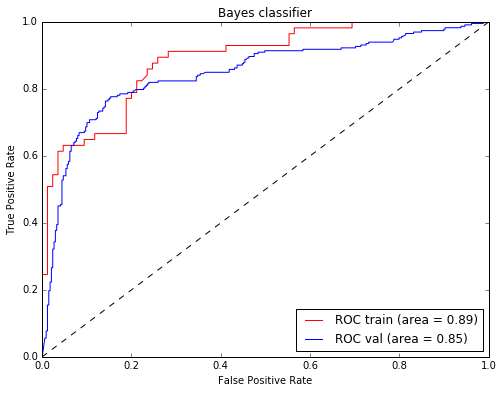

In [25]:
ROCplot(y_train, y_train_prob, y_val,y_val_prob, 'Bayes classifier')